In [204]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
import os
import sys

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network as qn
import qubit_network.net_analysis_tools as nat
from utils import chop

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [298]:
nat.resave_all_pickle_as_json()

In [303]:
net_files = glob.glob('../data/nets/*.pickle')

data = []

for net_file in net_files:
    net = qn.load_network_from_file(net_file)
    
    try:
        data.append({})
        data[-1]['name'] = os.path.splitext(os.path.basename(net_file))[0]
        data[-1]['num_qubits'] = net.num_qubits
        data[-1]['fid'] = net.test_fidelity_without_theano(n_samples=100)
    except:
        print('An error was raised processing {}'.format(net_file))
        continue

pd.DataFrame(data)[['name', 'num_qubits', 'fid']]

An error was raised processing ../data/nets/CCrandomrandom_3q+1a_all.pickle
An error was raised processing ../data/nets/controlled_stuff.pickle
An error was raised processing ../data/nets/hadamard5qb.pickle


,name,num_qubits,fid
0,qft_3q+5a_all,8,0.987308
1,toffoli_Banchietal,4,0.997298
2,qft5qb,5,0.699329
3,hadamard,4,1.000000
4,fredkin,4,0.978781
5,qft_3q+1a_all_0.79f,4,0.798209
6,CCrandomrandom_3q+1a_all,4,NaN
7,fredkin_good,4,0.995381
8,halfadder_3q+1a_all_f998,4,0.998548
9,controlled_stuff,4,NaN


Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


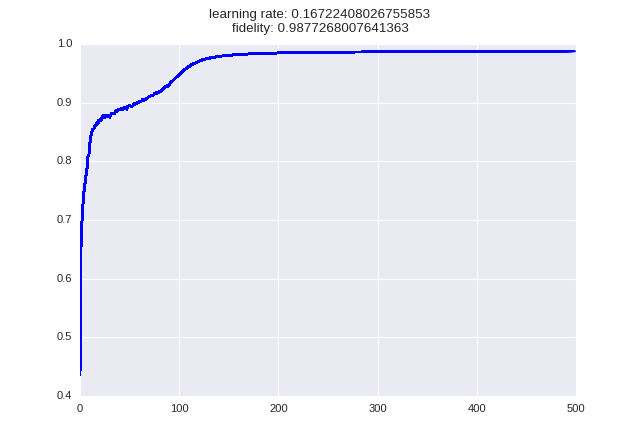

Finished training
Final fidelity: 0.988839491929984


In [165]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


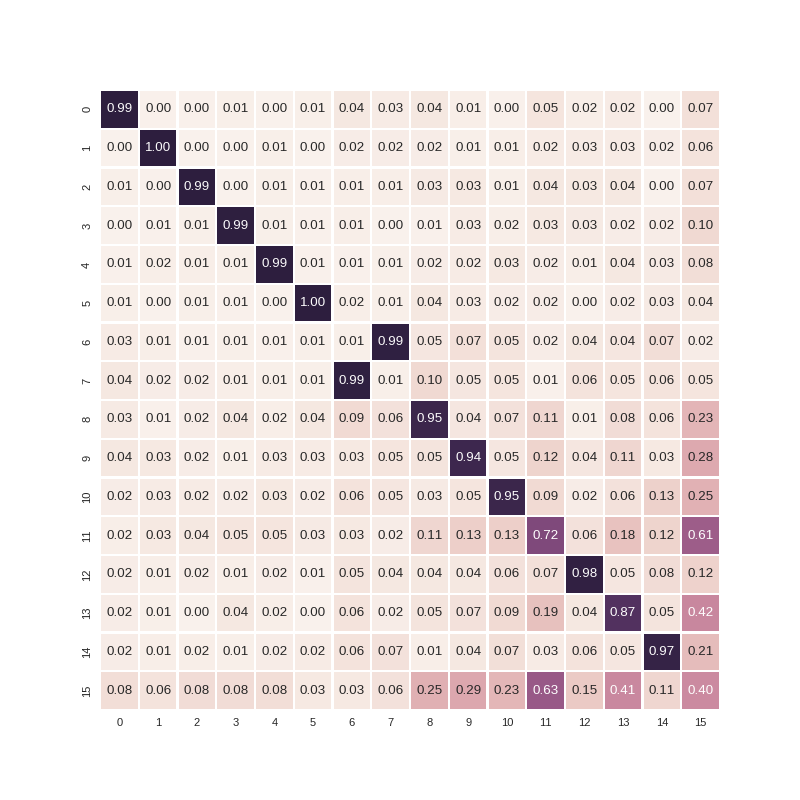

In [185]:
qn.plot_gate(net, permutation=[3, 0, 1, 2])

<IPython.core.display.Javascript object>


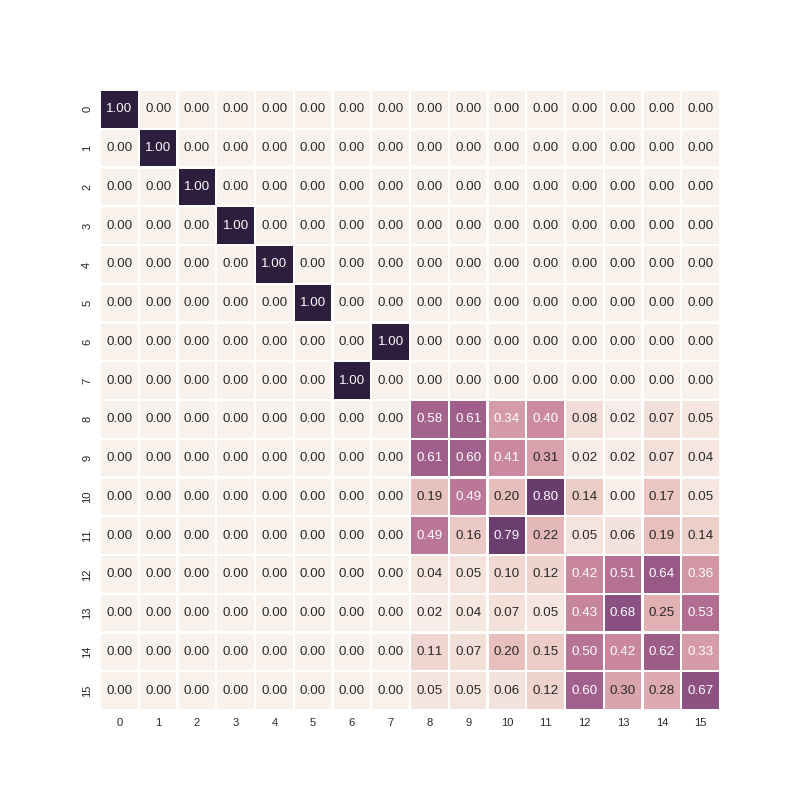

In [192]:
qn.plot_gate(othernet, permutation=[3, 0, 1, 2])